<a href="https://colab.research.google.com/github/cgyireh1/Empowering-Girls-in-STEM/blob/main/Empowering_Girls_in_STEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Empowering-Girls-in-STEM
The primary objective of this project is to analyze factors influencing girls' pursuit of STEM (Science, Technology, Engineering, and Mathematics) careers by using a machine learning model to predict the likelihood of students pursuing STEM based on various demographic, educational, and extracurricular factors.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.compose import ColumnTransformer

## Data Preprocessing

In [21]:
# Loading the data
data = pd.read_csv('/content/Student_performance_data _.csv')

print(data.shape)
print(data.head)

(2392, 15)
<bound method NDFrame.head of       StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0          1001   17       1          0                  2        19.833723   
1          1002   18       0          0                  1        15.408756   
2          1003   15       0          2                  3         4.210570   
3          1004   17       1          0                  3        10.028829   
4          1005   17       1          0                  2         4.672495   
...         ...  ...     ...        ...                ...              ...   
2387       3388   18       1          0                  3        10.680555   
2388       3389   17       0          0                  1         7.583217   
2389       3390   16       1          0                  2         6.805500   
2390       3391   16       1          1                  0        12.416653   
2391       3392   16       1          0                  2        17.819907   

      Abse

In [22]:
# finding missing values in the dataset
print(data.isnull().sum())

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [23]:
print(data.dtypes)

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object


In [24]:
print(data.describe)

<bound method NDFrame.describe of       StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0          1001   17       1          0                  2        19.833723   
1          1002   18       0          0                  1        15.408756   
2          1003   15       0          2                  3         4.210570   
3          1004   17       1          0                  3        10.028829   
4          1005   17       1          0                  2         4.672495   
...         ...  ...     ...        ...                ...              ...   
2387       3388   18       1          0                  3        10.680555   
2388       3389   17       0          0                  1         7.583217   
2389       3390   16       1          0                  2         6.805500   
2390       3391   16       1          1                  0        12.416653   
2391       3392   16       1          0                  2        17.819907   

      Absences  T

In [25]:
print(data.info)

<bound method DataFrame.info of       StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0          1001   17       1          0                  2        19.833723   
1          1002   18       0          0                  1        15.408756   
2          1003   15       0          2                  3         4.210570   
3          1004   17       1          0                  3        10.028829   
4          1005   17       1          0                  2         4.672495   
...         ...  ...     ...        ...                ...              ...   
2387       3388   18       1          0                  3        10.680555   
2388       3389   17       0          0                  1         7.583217   
2389       3390   16       1          0                  2         6.805500   
2390       3391   16       1          1                  0        12.416653   
2391       3392   16       1          0                  2        17.819907   

      Absences  Tut

In [26]:
# Defining a binary target variable for GPA
data['GPA_Pass'] = (data['GPA'] > 2.5).astype(int)

In [27]:
X = data.drop(columns=['StudentID', 'GPA', 'GradeClass', 'GPA_Pass'])
y = data['GPA_Pass']

# Defining the categorical and numerical features
categorical_features = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring',
                        'Extracurricular', 'Sports', 'Music', 'Volunteering']
numerical_features = ['Age', 'StudyTimeWeekly', 'Absences', 'ParentalSupport']

# Creating the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Splitting the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Fitting the preprocessor on the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

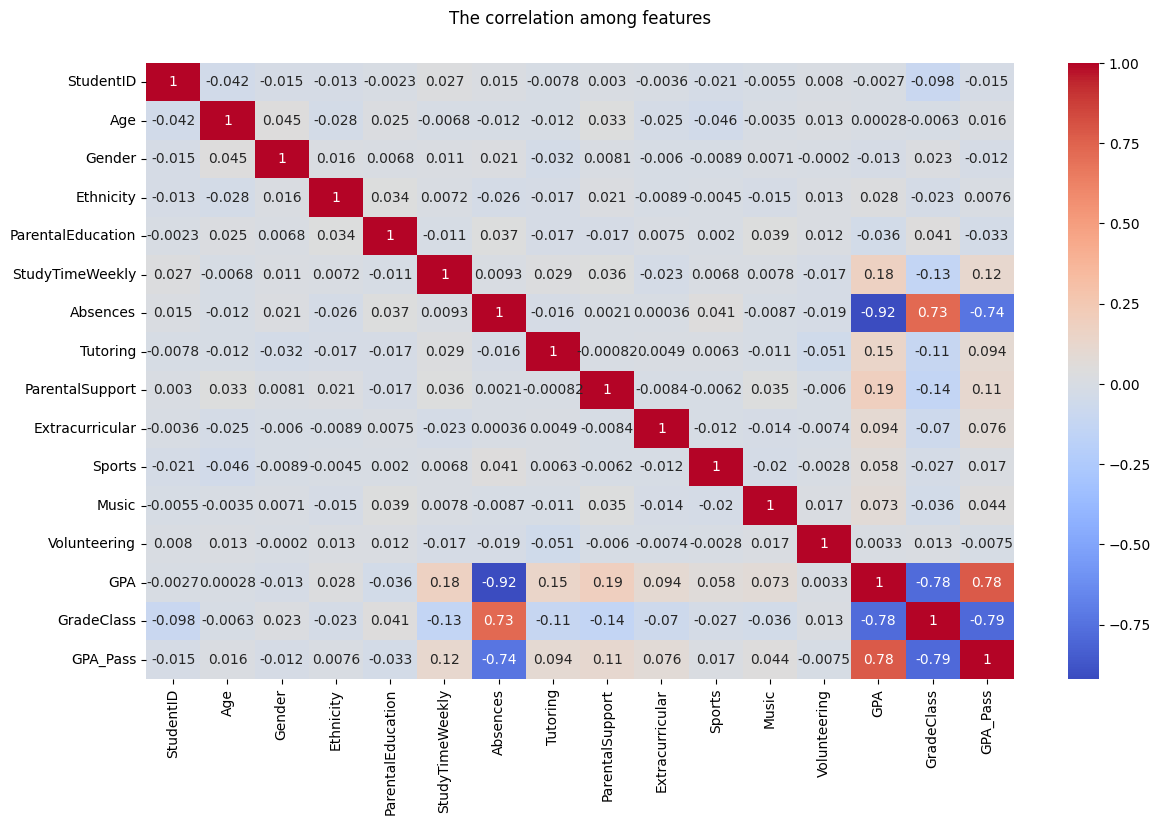

In [28]:
plt.figure(figsize=(14, 8))
sns.heatmap(data.corr(), annot = True, cmap = "coolwarm")
plt.title('The correlation among features',y= 1.05)
plt.show()

In [43]:
model = keras.Sequential([
    layers.Input(shape=(X_train_processed.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_processed, y_train, validation_data=(X_val_processed, y_val), epochs=200, verbose=0)

loss, accuracy = model.evaluate(X_test_processed, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9014 - loss: 0.7421 
Test Loss: 0.5713382363319397
Test Accuracy: 0.9247910976409912


In [46]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

optimized_model = keras.Sequential([
    layers.Input(shape=(X_train_processed.shape[1],)),
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l1(0.01)),
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])


optimized_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
optimized_model.fit(X_train_processed, y_train, validation_data=(X_val_processed, y_val),
                    epochs=100, callbacks=[early_stopping], verbose=0)


loss, accuracy = optimized_model.evaluate(X_test_processed, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9406 - loss: 0.1899 
Test Loss: 0.16312599182128906
Test Accuracy: 0.9498607516288757


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


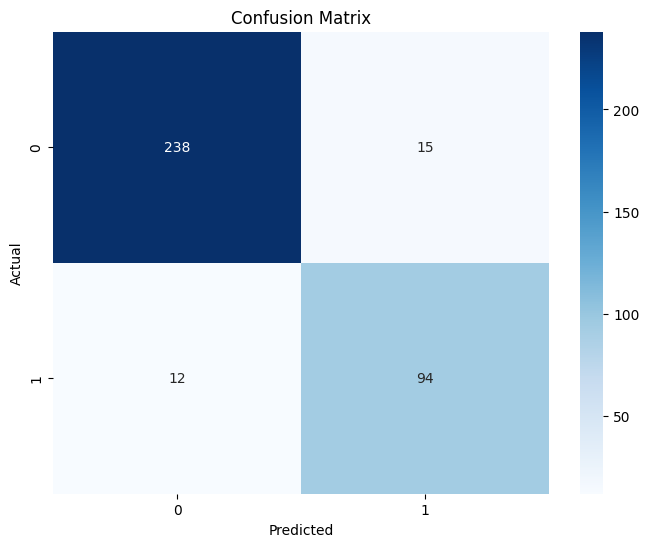

In [47]:
# Generate predictions
predictions = model.predict(X_test_processed)
predicted_classes = (predictions > 0.5).astype(int)

# Create confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


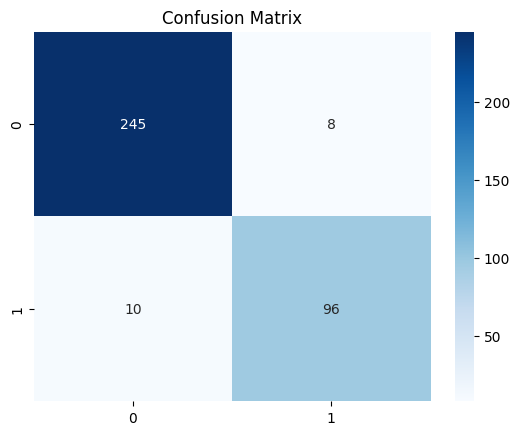

In [49]:
predictions = optimized_model.predict(X_test_processed)
predicted_classes = (predictions > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [50]:
# F1 Score and Specificity
f1 = f1_score(y_test, predicted_classes)
specificity = cm[0][0] / (cm[0][0] + cm[0][1])  # TN / (TN + FP)

print(f"F1 Score: {f1}")
print(f"Specificity: {specificity}")

F1 Score: 0.9142857142857143
Specificity: 0.9683794466403162


In [51]:
# Make predictions
predictions = model.predict(X_test_processed)
predicted_classes = (predictions > 0.5).astype(int)

# Print classification report
print(classification_report(y_test, predicted_classes))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       253
           1       0.86      0.89      0.87       106

    accuracy                           0.92       359
   macro avg       0.91      0.91      0.91       359
weighted avg       0.93      0.92      0.93       359



In [57]:
print("=== Model With No Optimization Evaluation ===")
loss, accuracy = model.evaluate(X_test_processed, y_test)
print(f"Simple Test Loss: {loss:.5f}")
print(f"Simple Test Accuracy: {accuracy:.5f}\n")

print("=== Optimized Model Evaluation ===")
optimized_loss, optimized_accuracy = optimized_model.evaluate(X_test_processed, y_test)
print(f"Optimized Test Loss: {optimized_loss:.5f}")
print(f"Optimized Test Accuracy: {optimized_accuracy:.5}")

=== Model With No Optimization Evaluation ===
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9014 - loss: 0.7421 
Simple Test Loss: 0.57134
Simple Test Accuracy: 0.92479

=== Optimized Model Evaluation ===
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9406 - loss: 0.1899 
Optimized Test Loss: 0.16313
Optimized Test Accuracy: 0.94986


## Saving the models

In [59]:
model.save('model.keras')
optimized_model.save('optimized_model.keras')